In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
#one hot encoding
ytrain = to_categorical(y_train)
print(ytrain.shape)
ytest = to_categorical(y_test)
print(ytest.shape)

(50000, 10)
(10000, 10)


In [ ]:
xtrain_flat = X_train.astype(float)
xtest_flat = X_test.astype(float)

xtrain_noramlized = xtrain_flat/255
xtest_noramlized = xtest_flat/255

print(xtrain_noramlized.shape)
print(xtest_noramlized.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# CNN with 3 VGG blocks
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=xtrain_noramlized,y=ytrain,batch_size=32,epochs=20,validation_data=(xtest_noramlized,ytest))

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5289 - accuracy: 0.4349 - val_loss: 1.1527 - val_accuracy: 0.5890
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0234 - accuracy: 0.6358 - val_loss: 0.9540 - val_accuracy: 0.6574
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8298 - accuracy: 0.7077 - val_loss: 0.8669 - val_accuracy: 0.6948
Epoch 4/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6963 - accuracy: 0.7544 - val_loss: 0.8543 - val_accuracy: 0.7149
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5883 - accuracy: 0.7924 - val_loss: 0.8362 - val_accuracy: 0.7230
Epoch 6/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4966 - accuracy: 0.8263 - val_loss: 0.8590 - val_accuracy: 0.7271
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4192 - accuracy: 0.8520 - val_loss: 0.8236 -

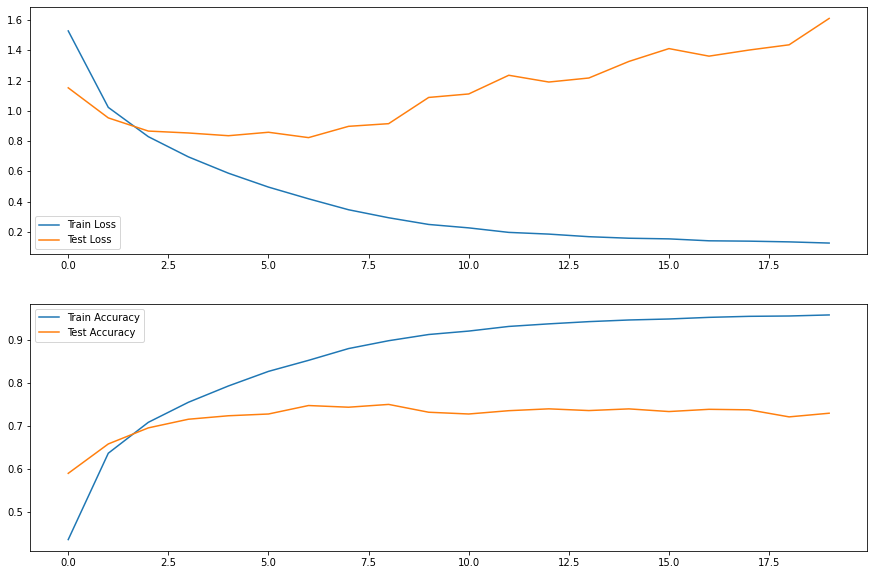

In [ ]:
# performance metrics
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 2s 6ms/step - loss: 1.6114 - accuracy: 0.7289


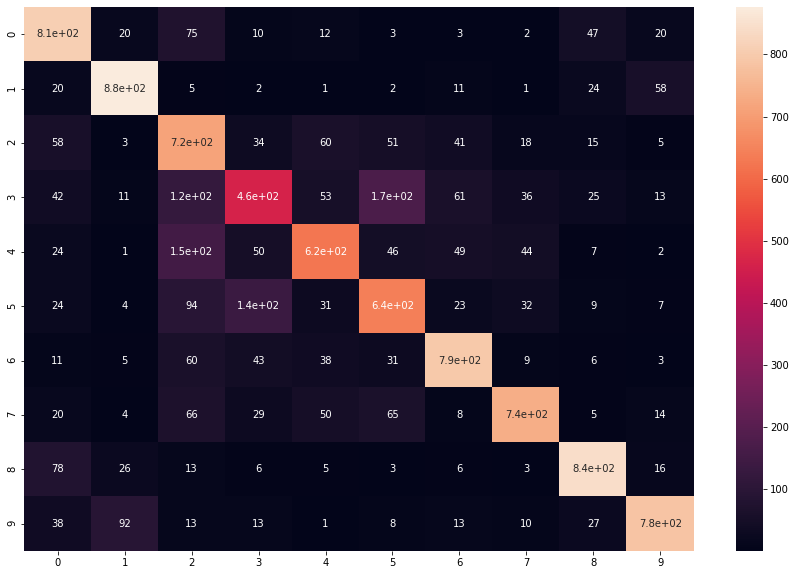

In [ ]:
evaluation = model.evaluate(x=xtest_noramlized,y=ytest,batch_size=32)
y_test_pred = model.predict(xtest_noramlized)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [ ]:
# Added dropout layer of value = 0.2
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=xtrain_noramlized,y=ytrain,batch_size=32,epochs=50,validation_data=(xtest_noramlized,ytest))

Epoch 1/50
1563/1563 [==============================] - 61s 20ms/step - loss: 1.6608 - accuracy: 0.3852 - val_loss: 1.2655 - val_accuracy: 0.5328
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2107 - accuracy: 0.5678 - val_loss: 1.0691 - val_accuracy: 0.6187
Epoch 3/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0409 - accuracy: 0.6362 - val_loss: 0.9318 - val_accuracy: 0.6741
Epoch 4/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9353 - accuracy: 0.6727 - val_loss: 0.8331 - val_accuracy: 0.7090
Epoch 5/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8481 - accuracy: 0.7024 - val_loss: 0.8973 - val_accuracy: 0.6890
Epoch 6/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7918 - accuracy: 0.7254 - val_loss: 0.8249 - val_accuracy: 0.7205
Epoch 7/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7534 - accuracy: 0.7385 - val_loss: 0.7663 -

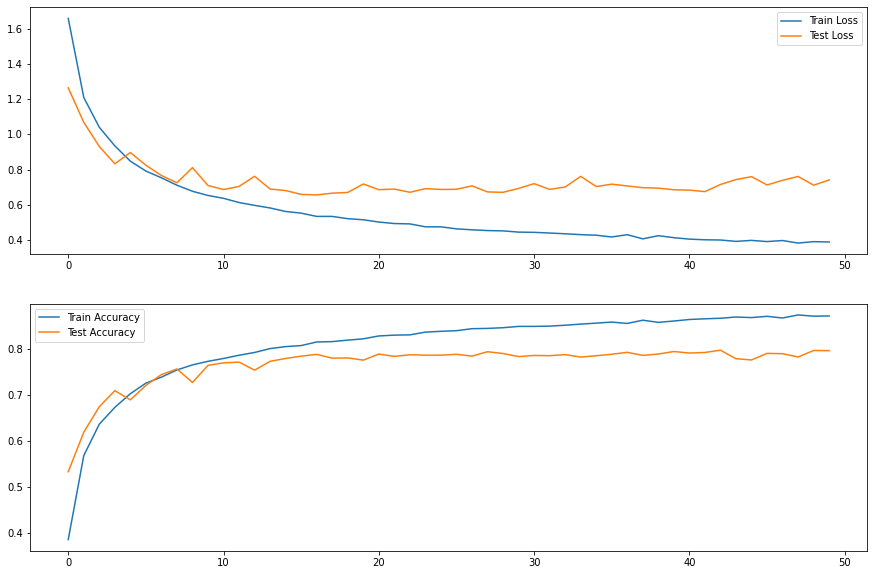

In [ ]:
# performacne metrices
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 3s 8ms/step - loss: 0.7410 - accuracy: 0.7960


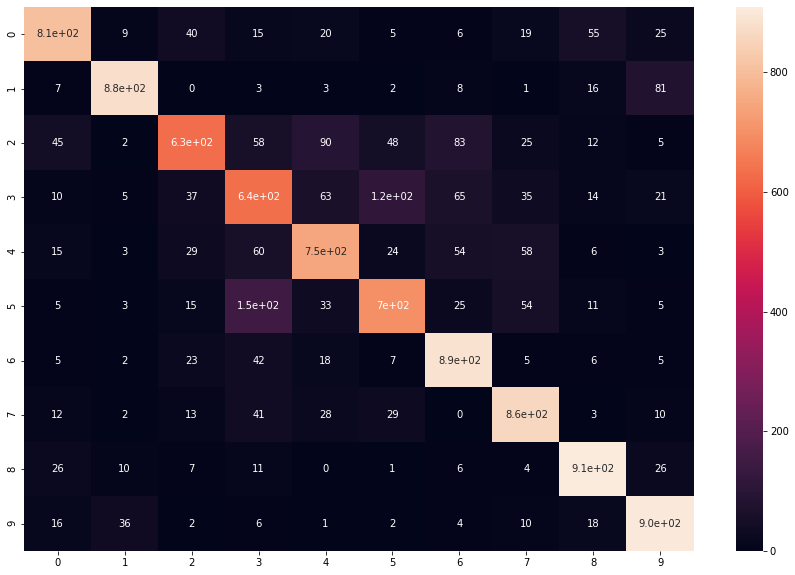

In [ ]:
evaluation = model.evaluate(x=xtest_noramlized,y=ytest,batch_size=32)
y_test_pred = model.predict(xtest_noramlized)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [ ]:
# Added dropout layer of value = 0.3
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=xtrain_noramlized,y=ytrain,batch_size=32,epochs=50,validation_data=(xtest_noramlized,ytest))

Epoch 1/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7246 - accuracy: 0.3539 - val_loss: 1.3576 - val_accuracy: 0.4962
Epoch 2/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3408 - accuracy: 0.5149 - val_loss: 1.1511 - val_accuracy: 0.5782
Epoch 3/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1878 - accuracy: 0.5793 - val_loss: 1.0459 - val_accuracy: 0.6272
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0912 - accuracy: 0.6145 - val_loss: 0.9452 - val_accuracy: 0.6670
Epoch 5/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0216 - accuracy: 0.6405 - val_loss: 0.9265 - val_accuracy: 0.6691
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9723 - accuracy: 0.6621 - val_loss: 0.8652 - val_accuracy: 0.6973
Epoch 7/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9290 - accuracy: 0.6761 - val_loss: 0.8168 -

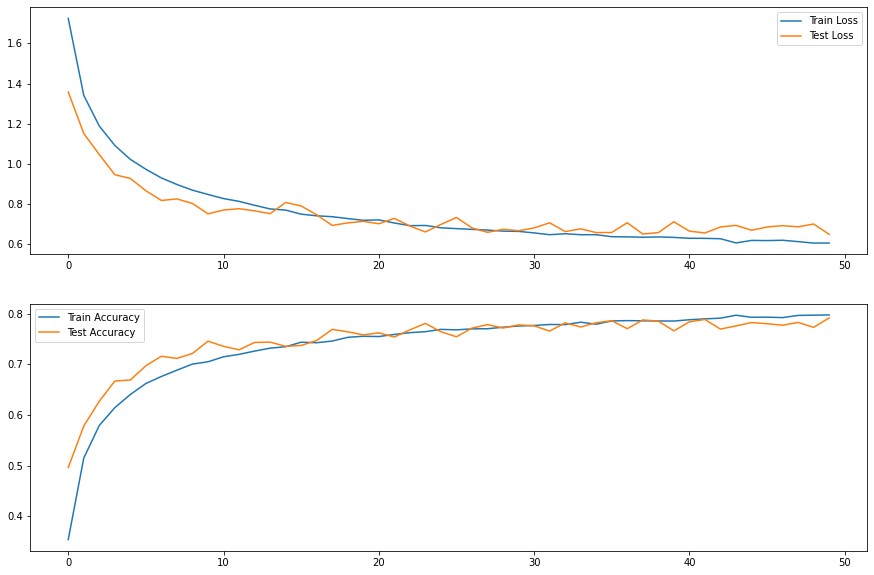

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 3s 8ms/step - loss: 0.6479 - accuracy: 0.7917


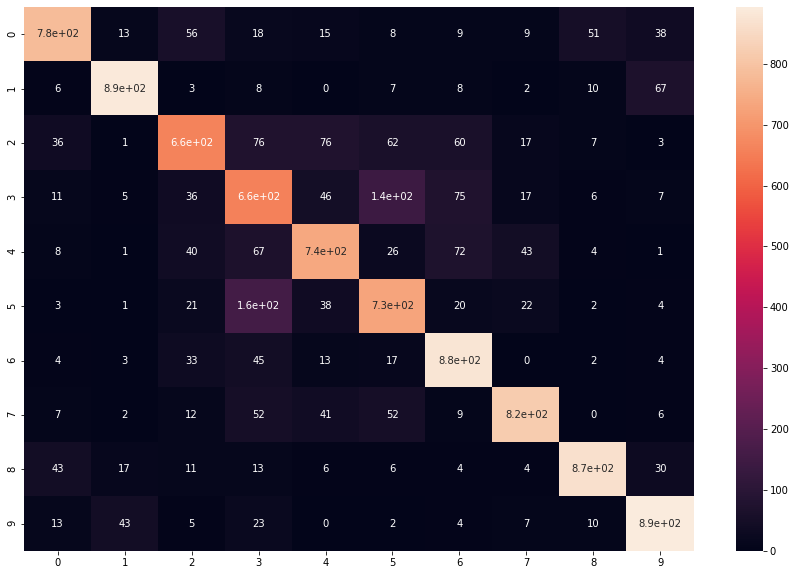

In [ ]:
evaluation = model.evaluate(x=xtest_noramlized,y=ytest,batch_size=32)
y_test_pred = model.predict(xtest_noramlized)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [ ]:
# Added batch Normalization layer
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=xtrain_noramlized,y=ytrain,batch_size=32,epochs=50,validation_data=(xtest_noramlized,ytest))

Epoch 1/50
1563/1563 [==============================] - 59s 20ms/step - loss: 1.6358 - accuracy: 0.4059 - val_loss: 1.2747 - val_accuracy: 0.5531
Epoch 2/50
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1386 - accuracy: 0.6039 - val_loss: 1.4602 - val_accuracy: 0.5287
Epoch 3/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9528 - accuracy: 0.6776 - val_loss: 0.7797 - val_accuracy: 0.7307
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8483 - accuracy: 0.7148 - val_loss: 0.7911 - val_accuracy: 0.7181
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7654 - accuracy: 0.7437 - val_loss: 0.6707 - val_accuracy: 0.7697
Epoch 6/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7156 - accuracy: 0.7614 - val_loss: 0.6364 - val_accuracy: 0.7840
Epoch 7/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6561 - accuracy: 0.7792 - val_loss: 0.6863 -

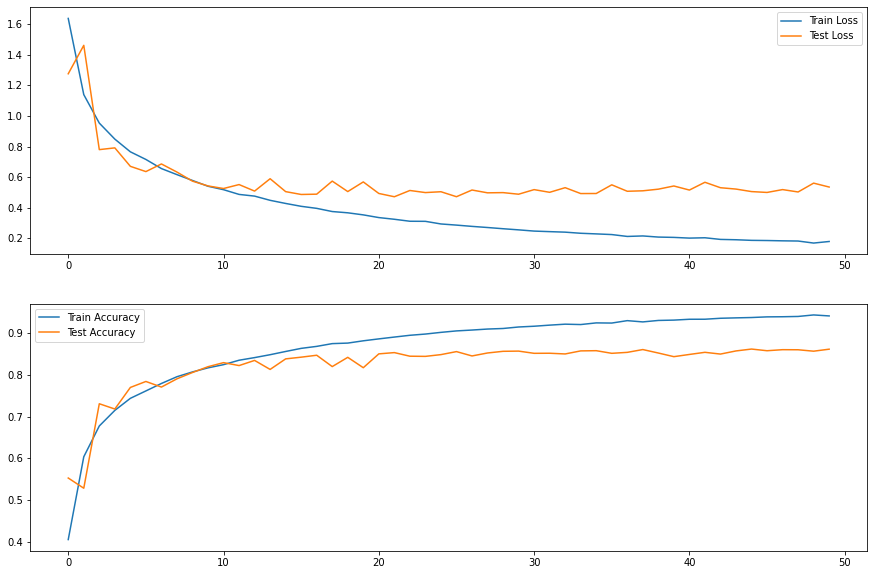

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 3s 8ms/step - loss: 0.5355 - accuracy: 0.8612


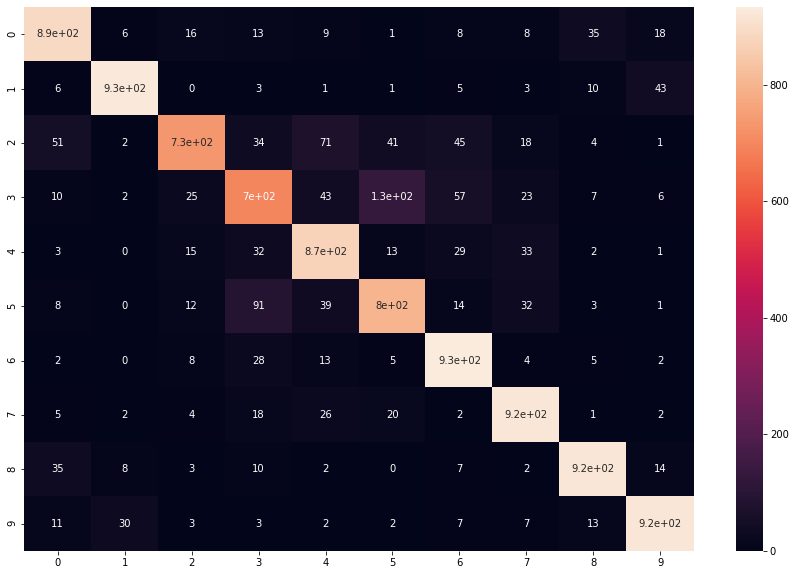

In [ ]:
evaluation = model.evaluate(x=xtest_noramlized,y=ytest,batch_size=32)
y_test_pred = model.predict(xtest_noramlized)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

Adding batch normalization improved the accuracy of the model from 79.60% to 86.12%

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation on train data and training the model on generated data along with train data

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.2,horizontal_flip=True)
it_train = datagen.flow(xtrain_noramlized, ytrain, batch_size=32)
history = model.fit(it_train, epochs=50, validation_data=(xtest_noramlized, ytest))

Epoch 1/50
1563/1563 [==============================] - 53s 33ms/step - loss: 0.6346 - accuracy: 0.7944 - val_loss: 0.4511 - val_accuracy: 0.8496
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5671 - accuracy: 0.8152 - val_loss: 0.4284 - val_accuracy: 0.8588
Epoch 3/50
1563/1563 [==============================] - 52s 34ms/step - loss: 0.5433 - accuracy: 0.8213 - val_loss: 0.4448 - val_accuracy: 0.8534
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5265 - accuracy: 0.8254 - val_loss: 0.4529 - val_accuracy: 0.8558
Epoch 5/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5115 - accuracy: 0.8311 - val_loss: 0.4277 - val_accuracy: 0.8597
Epoch 6/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5023 - accuracy: 0.8337 - val_loss: 0.4489 - val_accuracy: 0.8537
Epoch 7/50
1563/1563 [==============================] - 52s 33ms/step - loss: 0.4907 - accuracy: 0.8369 - val_loss: 0.4206 -

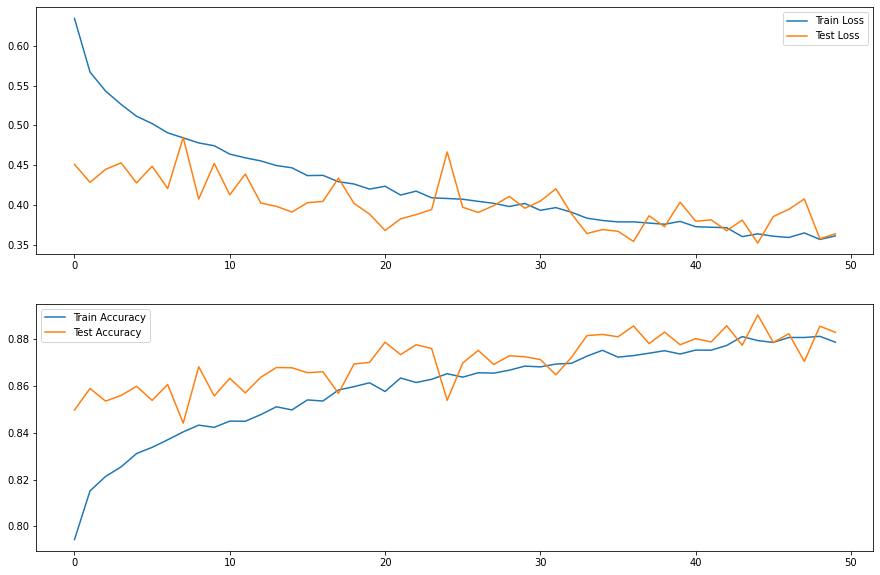

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 2s 8ms/step - loss: 0.3638 - accuracy: 0.8827


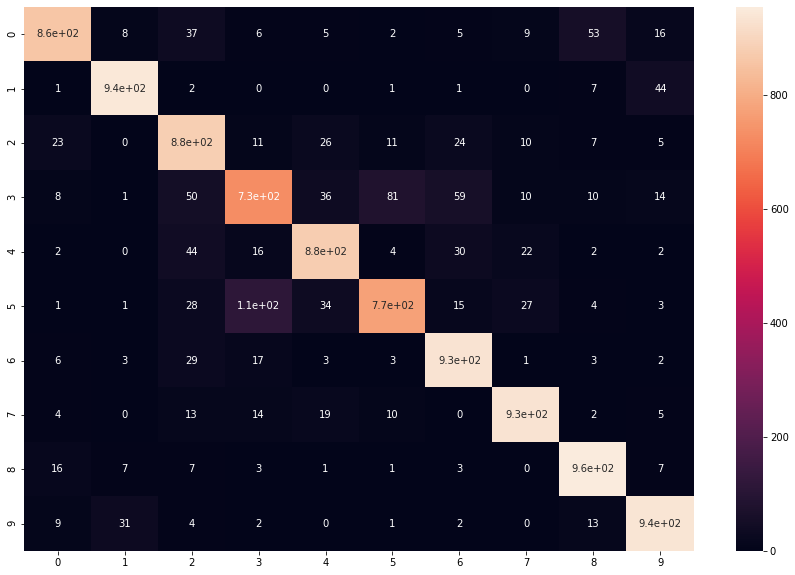

In [ ]:
evaluation = model.evaluate(x=xtest_noramlized,y=ytest,batch_size=32)
y_test_pred = model.predict(xtest_noramlized)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

With data augmentation, the performance of the model improved from 86.12% to 88.27%